In [1]:
from datetime import date, datetime
import pandas as pd
import calendar
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()
import jugaad_data.nse as nse

In [2]:
stock = nse.stock_df(symbol="TATAPOWER", from_date=date(2005,8,1), to_date=datetime.now().date())
stock['M'] = stock['DATE'].dt.month
stock['Y'] = stock['DATE'].dt.year
stock


,DATE,SERIES,OPEN,HIGH,LOW,PREV. CLOSE,LTP,CLOSE,VWAP,52W H,52W L,VOLUME,VALUE,NO OF TRADES,SYMBOL,M,Y
0,2022-01-18,EQ,250.0,250.60,237.80,247.85,239.30,239.10,245.10,267.85,74.45,30408196,7.453167e+09,229095,TATAPOWER,1,2022
1,2022-01-17,EQ,245.9,249.25,245.00,244.40,248.00,247.85,247.52,267.85,74.45,25339181,6.272064e+09,193530,TATAPOWER,1,2022
2,2022-01-14,EQ,243.7,248.50,242.50,245.30,243.70,244.40,246.04,267.85,74.45,36940487,9.088842e+09,257715,TATAPOWER,1,2022
3,2022-01-13,EQ,239.0,246.70,236.50,237.75,245.05,245.30,242.08,267.85,74.45,50250827,1.216475e+10,294662,TATAPOWER,1,2022
4,2022-01-12,EQ,234.9,239.65,234.50,233.10,237.50,237.75,237.19,267.85,74.45,32665403,7.747843e+09,201701,TATAPOWER,1,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4078,2005-08-05,EQ,415.0,431.95,413.15,408.35,431.00,428.95,424.25,431.95,212.50,1474202,6.254324e+08,0,TATAPOWER,8,2005
4079,2005-08-04,EQ,408.0,411.90,399.95,406.90,407.20,408.35,407.38,430.00,212.50,252380,1.028158e+08,0,TATAPOWER,8,2005
4080,2005-08-03,EQ,412.0,416.75,405.00,410.10,405.00,406.90,411.07,430.00,212.50,318674,1.309979e+08,0,TATAPOWER,8,2005
4081,2005-08-02,EQ,407.9,415.00,405.55,403.40,410.00,410.10,410.68,430.00,212.50,649289,2.666531e+08,0,TATAPOWER,8,2005


In [3]:
stock.sort_values('DATE', inplace=True)
stock.reset_index(drop=True, inplace=True)

In [4]:
stock.set_index('DATE', inplace=True)

In [5]:
stock_monthly = stock.resample("M").last()

In [6]:
stock_monthly['Returns'] = (stock_monthly['CLOSE'] - stock_monthly['CLOSE'].shift(1))*100/stock_monthly['CLOSE'].shift(1)


In [13]:
stock_monthly

,SERIES,OPEN,HIGH,LOW,PREV. CLOSE,LTP,CLOSE,VWAP,52W H,52W L,VOLUME,VALUE,NO OF TRADES,SYMBOL,M,Y,Returns
DATE,,,,,,,,,,,,,,,,,
2005-08-31,EQ,434.80,452.50,429.05,431.30,449.50,450.75,443.30,452.50,257.00,1344795,5.961507e+08,0,TATAPOWER,8,2005,NaN
2005-09-30,EQ,467.80,496.00,456.00,468.50,482.05,480.90,471.72,496.00,287.15,582958,2.749934e+08,0,TATAPOWER,9,2005,6.688852
2005-10-31,EQ,390.15,401.45,390.15,390.25,393.55,395.40,395.67,496.00,289.20,522680,2.068066e+08,0,TATAPOWER,10,2005,-17.779164
2005-11-30,EQ,453.00,460.95,444.20,451.35,444.85,446.40,453.36,496.00,326.00,1058903,4.800652e+08,0,TATAPOWER,11,2005,12.898331
2005-12-31,EQ,429.00,439.00,427.00,431.75,437.90,436.20,433.93,496.00,326.00,444866,1.930416e+08,0,TATAPOWER,12,2005,-2.284946
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-30,EQ,152.50,161.20,151.30,151.60,158.50,158.75,156.65,161.20,51.65,111302311,1.743592e+10,435861,TATAPOWER,9,2021,23.014336
2021-10-31,EQ,210.50,217.70,201.40,218.00,216.15,214.30,211.52,267.85,51.65,115032835,2.433222e+10,615528,TATAPOWER,10,2021,34.992126
2021-11-30,EQ,221.95,228.25,213.10,218.65,216.30,216.80,218.85,267.85,65.00,222571262,4.870941e+10,487766,TATAPOWER,11,2021,1.166589


In [14]:
heatmap_ret = pd.pivot_table(stock_monthly, index='Y', columns='M', values=['Returns'])
heatmap_ret

Returns                                                         \
M            1          2          3          4          5          6    
Y                                                                        
2005        NaN        NaN        NaN        NaN        NaN        NaN   
2006   8.161394   8.350996  13.928013  -5.091003  -9.525102  -3.519296   
2007   8.019625 -10.355934  -6.163058  16.208522  -1.030667  14.494238   
2008 -13.067583   9.542627 -16.315451  19.159198  -2.937068 -21.989741   
2009   1.828739  -4.719145   5.743964  16.679677  19.363292   7.464151   
2010  -5.541279  -7.031190  13.230021  -1.142940  -5.346294   1.789396   
2011  -8.967083  -7.477275  16.084858  -2.303112  -5.565777   6.206365   
2012  19.083095  10.587103 -12.140992   4.606241 -11.458333  11.978610   
2013  -8.382420  -6.627102   2.224576  -1.865285  -5.596621  -3.467562   
2014 -19.047619   6.558485   8.058376  -8.279507  32.906530   3.853565   
2015  10.164334  -4.033149 -11.226252  -1.686122  -1.649077  -0.536553   
2016 -11.487482  -4.658902  12.827225   9.048724   4.609929  -0.542373   
2017   5.138340   3.508772   9.382567  -6.696182  -3.914591  -0.555556   
2018  -4.812834  -5.056180  -6.508876  11.772152  -7.927520  -9.901599   
2019  -7.161458  -8.204769  12.757830  -8.130081   1.474926   0.290698   
2020   2.831858 -19.621343 -29.657388  -3.500761  15.299685  22.708618   
2021  -0.330469  26.193634   8.512874  -4.261501   7.688417  14.701738   
2022   8.214528        NaN        NaN        NaN        NaN        NaN   

                                                                        
M            7          8          9          10         11         12  
Y                                                                       
2005        NaN        NaN   6.688852 -17.779164  12.898331  -2.284946  
2006   1.398964   7.879407   7.588102  -4.807608   7.538618  -3.578187  
2007   9.572803  -6.817718  24.760862  42.069531  -3.715910  25.795824  
2008   9.526963  -9.233826 -13.670537 -23.981701  -3.052494  12.055942  
2009  13.126440   0.572482   0.706754   1.578089   1.176383   1.982135  
2010   0.963045  -7.460540  10.863874   3.110242  -7.435503   5.574239  
2011  -2.067648 -18.455354 -90.442690   0.600901  -8.661025  -4.904632  
2012  -6.160458   1.272265   7.487437  -0.841515   1.650165   2.365492  
2013   2.027810 -13.855764   6.987475   1.232286  -3.225806  14.905660  
2014  -9.322820 -11.406650  -4.099307  13.004214  -0.905701 -11.666667  
2015  -7.687121 -11.541271   7.266722   6.004619  -2.977487   1.646707  
2016  -1.840491   9.027778  -3.949045   3.580902  -5.185659   2.498312  
2017   1.800124  -3.353659  -1.829653   9.125964  11.542992  -1.267159  
2018   1.774744   2.883970 -14.146023  16.249051  -0.587851   0.919842  
2019 -12.246377  -6.275805  10.132159  -5.120000  -3.288364  -1.482127  
2020   8.584169  20.636550  -9.276596  -2.157598  24.448706  16.563945  
2021   2.375102   3.240000  23.014336  34.992126   1.166589   1.914207  
2022        NaN        NaN        NaN        NaN        NaN        NaN

In [9]:
heatmap_ret.columns = [calendar.month_name[i] for i in range(1,13) ]


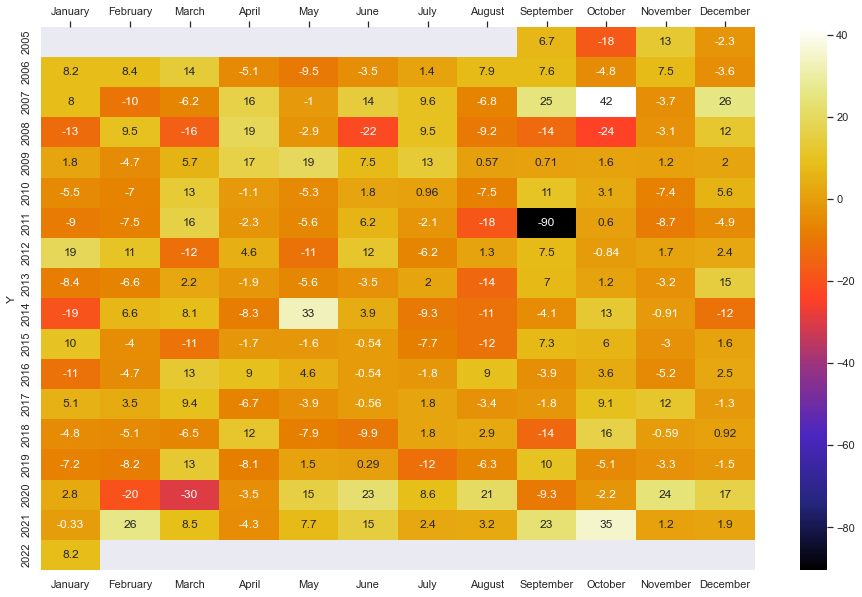

In [10]:
plott = plt.figure(figsize=(16, 10))
ax = sns.heatmap(heatmap_ret, cmap='CMRmap', annot=True)
ax.tick_params(top=True, labeltop=True)
